In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_data_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_data_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X_train = train_data[selected_features].fillna(train_data[selected_features].mean())
y_train = train_data['SalePrice']

In [5]:
X_test = test_data[selected_features].fillna(train_data[selected_features].mean())

In [6]:
X_train['TotalRooms'] = train_data['BedroomAbvGr'] + train_data['FullBath']
X_test['TotalRooms'] = test_data['BedroomAbvGr'] + test_data['FullBath']

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse_scores = np.sqrt(-cv_scores)

In [10]:
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean():.2f} (± {cv_rmse_scores.std():.2f})')

Cross-Validation RMSE: 51501.15 (± 5661.02)


In [11]:
predictions = model.predict(X_test_scaled)

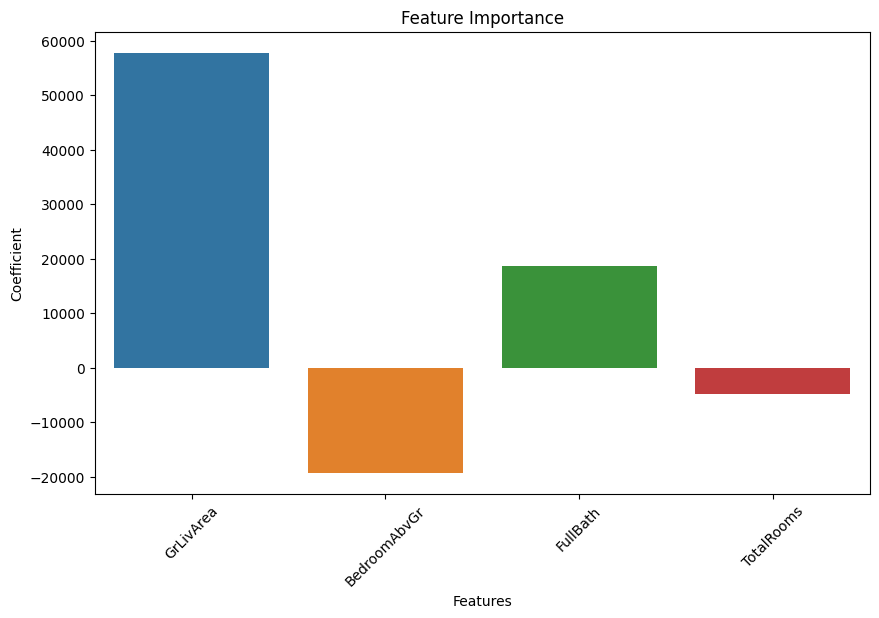

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=model.coef_)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

In [13]:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
print(submission.head())

     Id      SalePrice
0  1461  120100.812977
1  1462  139898.208279
2  1463  202611.414586
3  1464  199859.871426
4  1465  192059.204300


In [14]:
y_train_pred = model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

In [15]:
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Training R^2: {train_r2:.2f}')

Training RMSE: 51269.24
Training R^2: 0.58
